In [29]:
import calendar
import pandas as pd
import csv
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas

wildfires_df = pd.read_csv("US_Lightning_Forest_Fires.csv")

In [30]:
del wildfires_df["STAT_CAUSE_DESCR"]
del wildfires_df["Unnamed: 0"]

In [31]:
wildfires_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,1,2004,05-12-2004,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,3,2004,06-28-2004,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,4,2004,06-28-2004,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,5,2004,06-30-2004,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,6,2004,07-01-2004,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [32]:
oregon_df = wildfires_df.loc[(wildfires_df["STATE"] == "OR"), :]

In [33]:
county_count = oregon_df["FIPS_NAME"].value_counts()
county_name = county_count.index
county_occurences = county_count.values
x_axis = np.arange(len(county_name.unique()))
tick_locations = [value for value in x_axis]

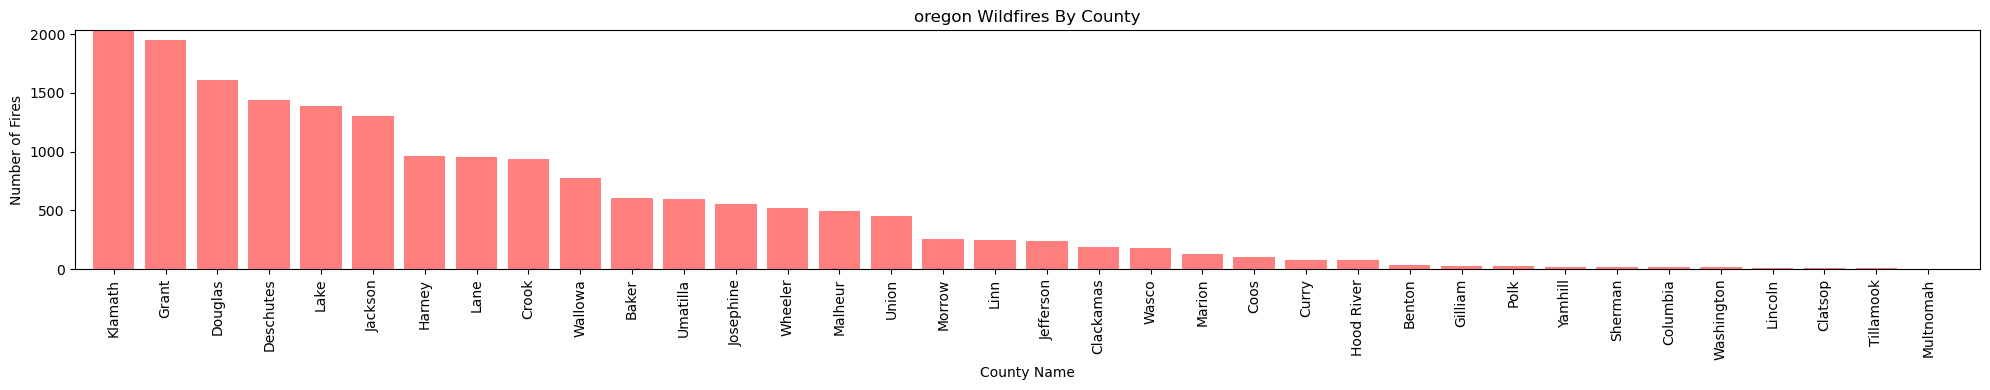

In [34]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, county_occurences, color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, county_name, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(county_occurences)+3)
plt.title("oregon Wildfires By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("oregon_df.png")
plt.show()

In [35]:
oregon_county_df = oregon_df[["LATITUDE","LONGITUDE","FIPS_NAME","FIRE_YEAR","Fire_Date"]]

In [36]:
#coordinates = {
#    "year":oregon_df["FIRE_YEAR"],
#    "latitude":oregon_county_df["LATITUDE"],
#    "longitude":oregon_county_df["LONGITUDE"],
#    "County":oregon_county_df["FIPS_NAME"]
#}

In [37]:
#coordinates_df = pd.DataFrame(coordinates)
#for years in coordinates_df['year']:
#coordinates_df[coordinates_df['year'] == years]
#map_plot_1 = coordinates_df.hvplot.points(
        #"longitude",
        #"latitude",
        #geo = True,
        #tiles = "OSM",
        #frame_width = 900,
        #frame_height = 1440
#)
    #plt.savefig(f'map_{years}.png')

#map_plot_1

In [38]:
oregon_county_df['FIPS_NAME'] = oregon_county_df['FIPS_NAME'].fillna("No Name Given")
fire_count_year = oregon_county_df["FIRE_YEAR"].value_counts().sort_index()
year = fire_count_year.index.sort_values()
x_axis = np.arange(len(year.unique()))
tick_locations = [value for value in x_axis]

C:\Users\Jolto\AppData\Local\Temp\ipykernel_17888\3622472652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oregon_county_df['FIPS_NAME'] = oregon_county_df['FIPS_NAME'].fillna("No Name Given")


In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, fire_count_year)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(round(pvalue,8))

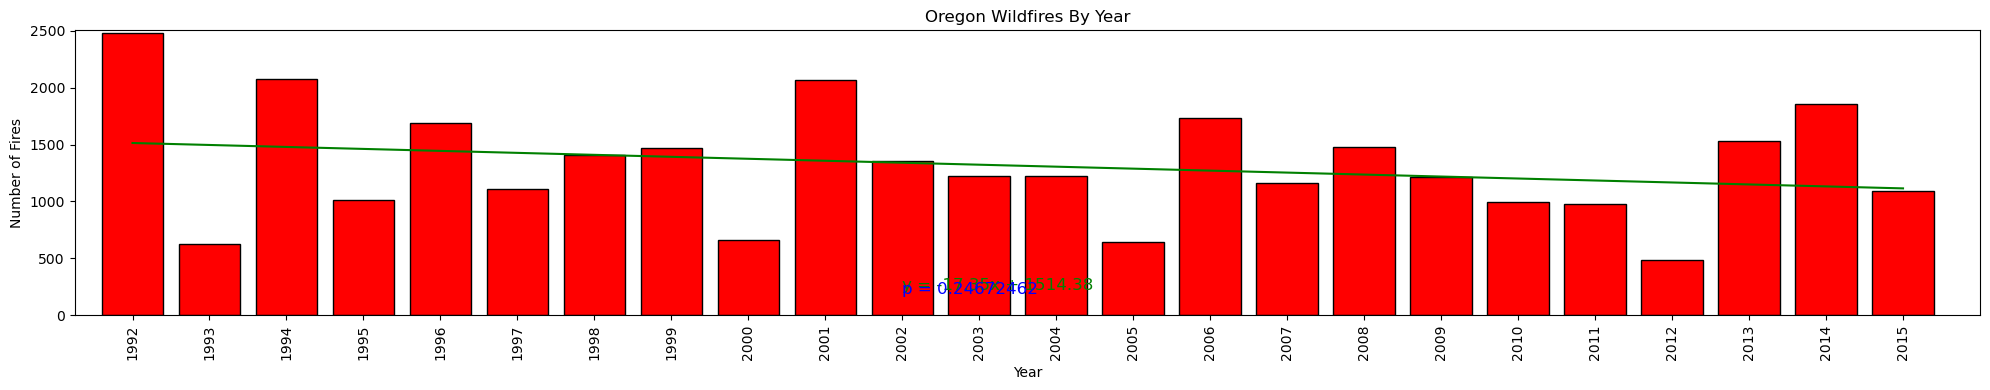

In [40]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, fire_count_year, color='r', edgecolor='black')
plt.plot(x_axis, regress_values, "g-")
plt.text(10,220, line_eq, fontsize=12, color='green')
plt.text(10,190, p_value, fontsize=12, color='blue')
plt.xticks(tick_locations, year, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(fire_count_year)+20)
plt.title("Oregon Wildfires By Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("oregon_year_fire.png")
plt.show()

In [41]:
oregon_date_df = oregon_county_df[['Fire_Date','FIPS_NAME']]
oregon_date_df['Fire_Date'] = pd.to_datetime(oregon_date_df['Fire_Date'], format='%m-%d-%Y')
oregon_date_df.head()

C:\Users\Jolto\AppData\Local\Temp\ipykernel_17888\200144492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oregon_date_df['Fire_Date'] = pd.to_datetime(oregon_date_df['Fire_Date'], format='%m-%d-%Y')


,Fire_Date,FIPS_NAME
24,2005-05-28,Lake
26,2005-06-25,Lake
27,2005-06-25,Lake
28,2005-06-24,Lake
31,2005-06-25,Lake


In [42]:
oregon_date_df['month'] = oregon_date_df['Fire_Date'].dt.month
oregon_date_df['month'] = oregon_date_df['month'].apply(lambda x: calendar.month_name[x])
oregon_date_df.head()

C:\Users\Jolto\AppData\Local\Temp\ipykernel_17888\498390951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oregon_date_df['month'] = oregon_date_df['Fire_Date'].dt.month
C:\Users\Jolto\AppData\Local\Temp\ipykernel_17888\498390951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oregon_date_df['month'] = oregon_date_df['month'].apply(lambda x: calendar.month_name[x])


,Fire_Date,FIPS_NAME,month
24,2005-05-28,Lake,May
26,2005-06-25,Lake,June
27,2005-06-25,Lake,June
28,2005-06-24,Lake,June
31,2005-06-25,Lake,June


In [43]:
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
oregon_date_df["month"] = pd.Categorical(oregon_date_df["month"], categories = months_categories)
oregon_date_df.sort_values(by = "month")

C:\Users\Jolto\AppData\Local\Temp\ipykernel_17888\3563377429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oregon_date_df["month"] = pd.Categorical(oregon_date_df["month"], categories = months_categories)


,Fire_Date,FIPS_NAME,month
213419,2009-01-19,Coos,January
186220,1996-01-15,Lincoln,January
181585,2005-01-08,Curry,January
180750,1993-01-01,Union,January
146247,2009-01-16,Curry,January
...,...,...,...
182903,2002-11-11,Coos,November
187476,2001-11-30,Lincoln,November
274095,2015-12-11,Lane,December
186246,1993-12-08,Douglas,December


In [44]:
fire_count_month = oregon_date_df["month"].value_counts().sort_index()
month = fire_count_month.index.sort_values()
x_axis = np.arange(len(month.unique()))
tick_locations = [value for value in x_axis]

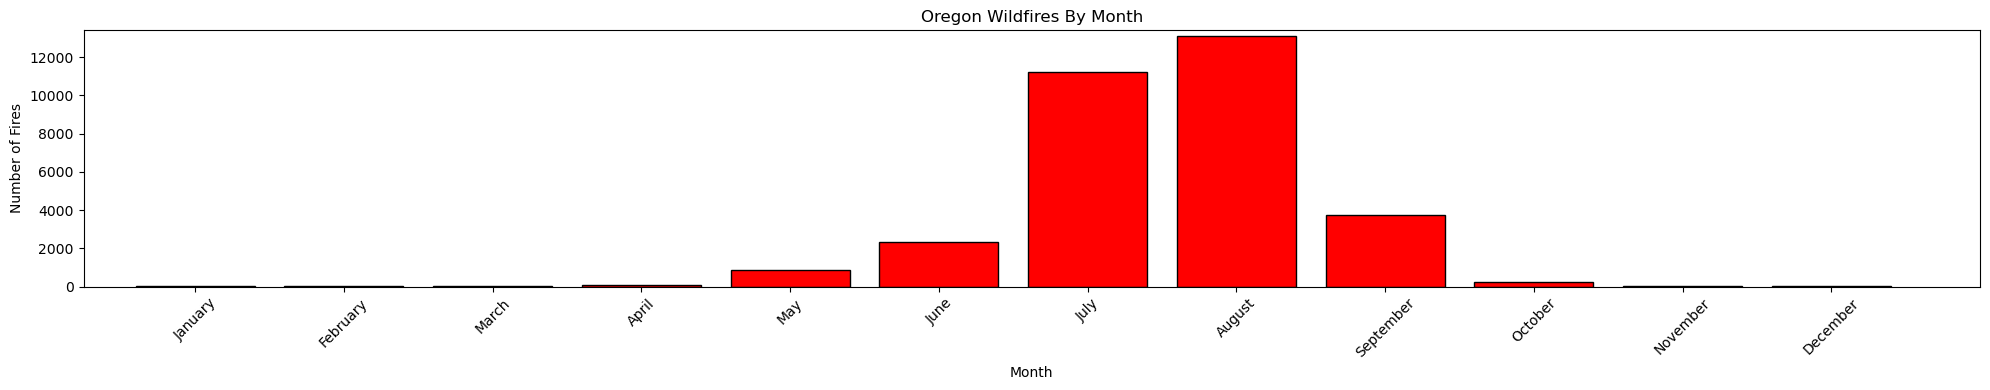

In [45]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, fire_count_month, color='red', edgecolor='black')
plt.xticks(tick_locations, month, rotation=45)
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(fire_count_month)+300)
plt.title("Oregon Wildfires By Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("oregon_month_fire.png")
plt.show()